In [1]:
import numpy as np
from MFEA_lib.tasks.function import Sphere, Ackley, Rosenbrock
from MFEA_lib.model.mfea import MFEA_base
from MFEA_lib.operators.CrossOver import SBX_CrossOver
from MFEA_lib.operators.Selection import ElitismSelection
from MFEA_lib.operators.Mutation import Polynomial_Mutation


In [2]:
print(Ackley(3).func(np.array([1, 2, 3])))
print(Sphere(3).func(np.array([1, 2, 3])))
print(Rosenbrock(3).func(np.array([1, 2, 3])))

7.0164536082694
14.0
201.0


In [3]:
print(Ackley(3).func(np.array([0, 0, 0])))
print(Sphere(3).func(np.array([0, 0, 0])))
print(Rosenbrock(3).func(np.array([1, 1, 1])))

4.440892098500626e-16
0.0
0.0


In [4]:
tasks = [Sphere(30, bound= [-100, 100]), 
        Ackley(50, bound= [-100, 100]), 
        Rosenbrock(20, bound= [-100, 100]), 
        Rosenbrock(30, bound= [-100, 100])
]


In [5]:
model = MFEA_base()
model.compile(
    cross_over= SBX_CrossOver(nc = 15),
    mutation= Polynomial_Mutation(nm = 15),
    selection= ElitismSelection()
)
sol, his = model.fit(tasks= tasks, num_generations= 2000, num_inds_each_task= 100, rmp =0.3)


Epoch [100/2000], [=>                  ]   5% ,func_val: [13847.082508334368, 20.498160091740555, 285625406.0753337, 1232887207.759875]

Epoch [200/2000], [==>                 ]  10% ,func_val: [2184.3516994631505, 20.21279858310517, 4229893.023897247, 34067274.93028798]

Epoch [300/2000], [===>                ]  15% ,func_val: [154.7621451283736, 20.095132471094193, 39103.8925189888, 277048.6246721369]

Epoch [400/2000], [====>               ]  20% ,func_val: [18.943715428440242, 20.04464862639733, 2276.3312780990846, 5428.842170296326]

Epoch [500/2000], [=====>              ]  25% ,func_val: [5.407420348055621, 20.024072679851148, 227.67078487342934, 452.3819350510877]

Epoch [600/2000], [======>             ]  30% ,func_val: [2.0282323147019676, 20.01726007477186, 84.52679381937008, 190.21105467988488]

Epoch [700/2000], [=======>            ]  35% ,func_val: [0.6058017142065668, 20.010465780439997, 50.24148075308136, 93.5073856482889]

Epoch [800/2000], [========>           ]  40%

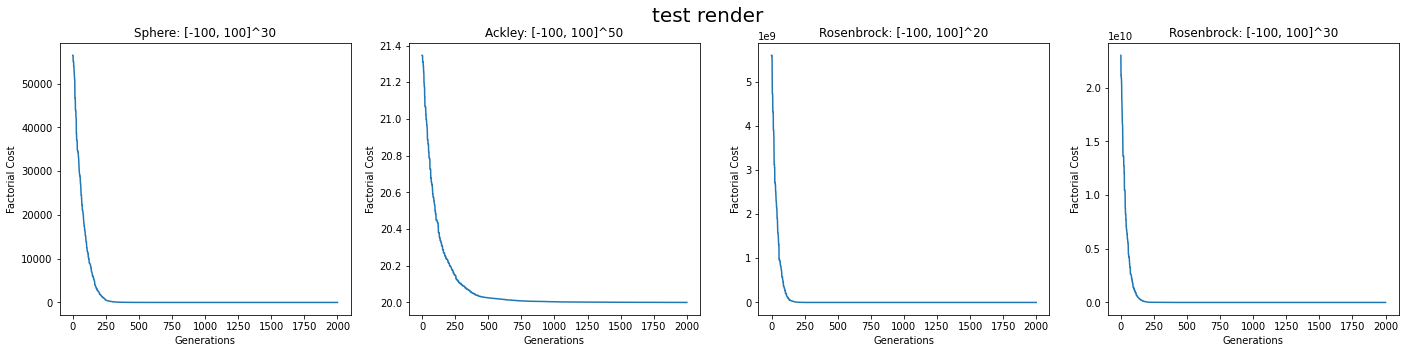

In [6]:
fig = model.render((1, 4), title= "test render")

In [12]:
model2 = MFEA_base()
model2.compile(
    cross_over= SBX_CrossOver(nc = 2),
    mutation= Polynomial_Mutation(nm = 5),
    selection= ElitismSelection()
)
sol2, his2 = model2.fit(tasks= tasks, num_generations= 2000, num_inds_each_task= 100, rmp =0.3)


Epoch [100/2000], [=>                  ]   5% ,func_val: [3640.351586023262, 20.362833086221986, 20490390.616497118, 98296971.79135282]

Epoch [200/2000], [==>                 ]  10% ,func_val: [335.78809173051195, 20.145539215249094, 170610.0550921003, 1102257.7111306763]

Epoch [300/2000], [===>                ]  15% ,func_val: [65.29246137956927, 20.0609812758125, 10349.768688502309, 25346.712457416685]

Epoch [400/2000], [====>               ]  20% ,func_val: [12.003872177304226, 20.035216355789846, 584.0270412807423, 1498.1987082982084]

Epoch [500/2000], [=====>              ]  25% ,func_val: [3.015569107115072, 20.016662817861334, 108.30884656678323, 209.12922429427212]

Epoch [600/2000], [======>             ]  30% ,func_val: [0.8390821683238397, 20.009574143937247, 51.00179564939975, 100.42523939011365]

Epoch [700/2000], [=======>            ]  35% ,func_val: [0.23486287245630558, 20.006555480374615, 26.367761134970173, 46.608481969573646]

Epoch [800/2000], [========>       

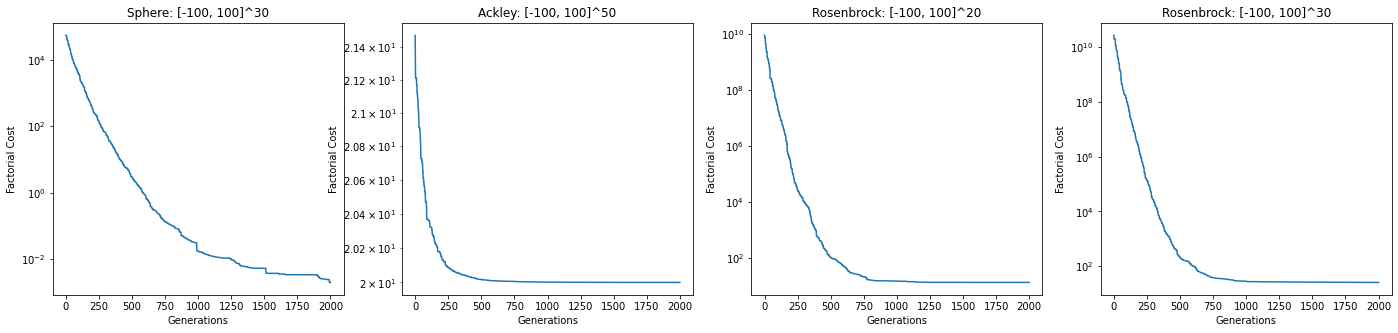

In [13]:
fig2 = model2.render((1, 4), "", yscale= "log")